In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("code")

import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
import scipy.io.wavfile as wave
import IPython

import utils as utils
import em as em

In [2]:
rate, x = wave.read("data/mix.wav")
T, I = x.shape
J = 3

print("rate = {}".format(rate))
print("T = {}".format(T))
print("I = {}".format(I))
print("J = {}".format(J))
IPython.display.Audio(x.transpose(), rate = rate)

rate = 22050
T = 220501
I = 2
J = 3


(2, 501, 443)
F = 501
N = 443


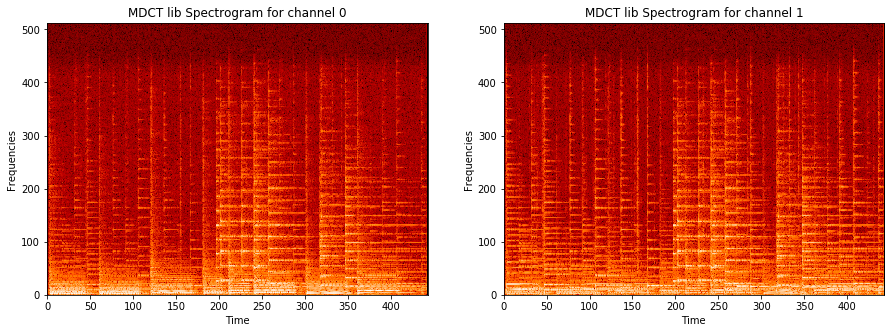

In [3]:
freqs, _, x_four = sig.stft(x.transpose(), fs = rate, nperseg = 1000)
F = len(freqs)
N = x_four.shape[-1]
print(x_four.shape)
print("F = {}".format(F))
print("N = {}".format(N))
    
utils.plot_stft(x_four)

In [4]:
def compute_Rxx(x1, x2 = None):
    if x2 == None:
        x2 = x1
    return x1.dot(x2.getH()) / x1.shape[-1]

Rxx = np.array([compute_Rxx(np.matrix(x_four[i])) for i in range(len(x_four))]).transpose()

# Parameters of the model

In [5]:
K = J + 1
Kcal = [0, 2, 3]

A = np.zeros((I, J, F), dtype=complex)
W = np.zeros((F, K), dtype=complex)
H = np.zeros((K, N), dtype=complex)
Sb = np.zeros((F, I, I), dtype=complex)

A += np.random.random(A.shape)
W += np.random.random(W.shape)
H += np.random.random(H.shape)
Sb += np.random.random(Sb.shape)

In [6]:
Rxs, Rss, u = em.compute_E_step(x_four, A, W, H, Sb, Kcal)
A, Sb, H, W = em.compute_M_step(Rxx, Rxs, Rss, u, H, W)

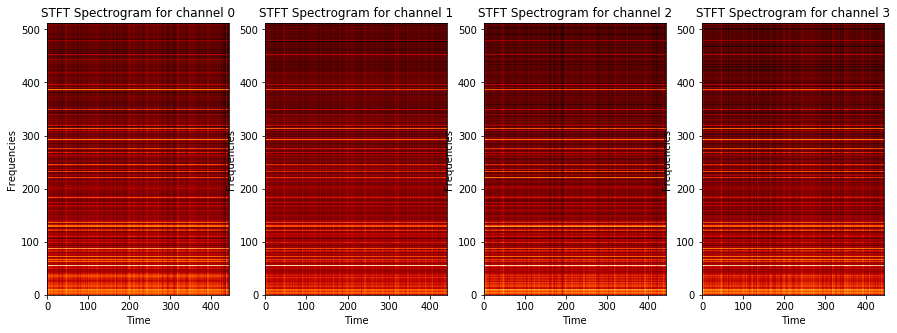

In [7]:
utils.plot_stft(np.array([W[:, i:i+1].dot(H[i:i+1, :]) for i in range(K)]))